<a href="https://colab.research.google.com/github/larissamazzero/RMN/blob/main/PLS/pls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Partial Least Squares Regression (PLS)

##Definição

A **Regressão Parcial de Mínimos Quadrados** (PLS) é uma técnica com o objetivo de diminuir o número de preditores a um conjunto menor de componentes, no lugar dos dados originais. A regressão PLS vem sendo muito utilizada devido a sua capacidade de operar com grandes números de variáveis correlacionadas e que são afetadas por ruído, diferentemente do OLS (Ordinary Least Squares), que gera coeficientes com erros altos ou que falham totalmente ao aplicados no mesmo conjunto de dados.

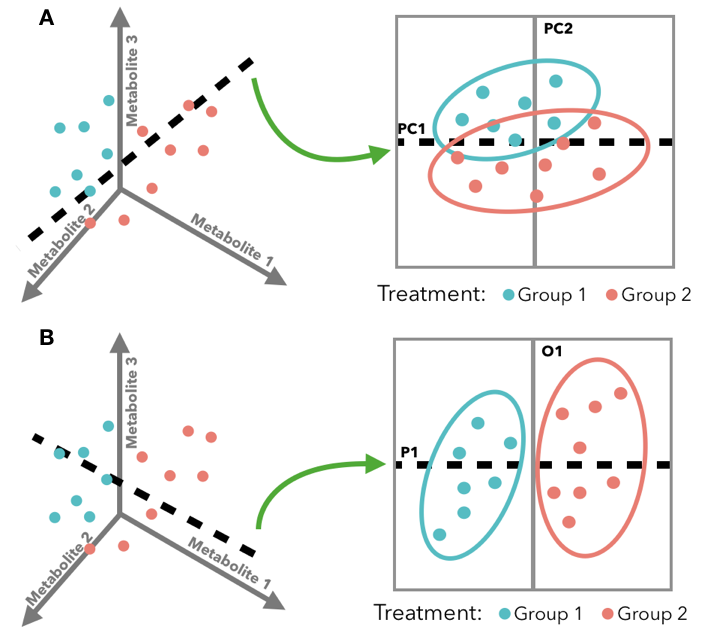

##Casos de uso

A Regressão PLS é usada em diversos setores, tais como químico, farmacêutico, plastíco e, no nesse caso, com enfase no **alimentício**. Uma aplicação consiste em realizar uma modelagem entre as medidas espectrais (NIR, IR e UV), essas que costumam possuir **muitas variáveis correlacionadas entre si**. 

Na indústria alimentícia, por exemplo, amostras de carne podem ser analisadas em relação ao seu teor de gordura, e o espectro NIR é utilizado para prever a concentração de gordura. Similares aplicações ocorrem na agricultura, onde é possível determinar as **propriedades dos grãos**.

##Funcionamento

* **PCA** é utilizado quando se quer melhorar a **análise estatística** de variaveis **altamente correlacionadas**, no entanto se as variáveis forem utilizadas como **explicativas ou independentes** na análise de regressão linear, **PLS** é a melhor alternativa.

A regressão PLS relaciona a matriz X (composta por variáveis de processo x) à matriz Y (composta por variáveis de produto y), permitindo analisar dados com alta correlação, elevados níveis de ruído e desequilíbrio entre o número de variáveis e observações. Tal regressão gera um conjunto de parâmetros que fornecem informações sobre a estrutura e comportamento de X e Y, o que corrobora para sua ampla aplicação em procedimentos de seleção de variáveis.

 

1.   Dividir o dataset em conjuntos de treino e teste;
  * Padronizar tanto as variáveis preditoras quanto as de resposta.

2.   Aplicar a regressão PLS no conjunto de treino e gerar índices de importência das variáveis;
  * Calcular M combinações lineares (chamadas de "componentes PLS") das variáveis preditoras p originais que explicam uma quantidade significativa de variação tanto na variável de resposta quanto nas variáveis preditoras.
  * Use o método dos mínimos quadrados para se ajustar a um modelo de regressão linear usando os componentes PLS como preditores.

3. Predizer a variável de resposta y para o conjunto de treino e eliminar as variáveis irrelevantes e ruidosas;

4. Construir um gráfico para identificar o melhor subconjunto de variáveis e testar essas variáveis no conjunto de teste;

  * Use a validação cruzada k-fold para encontrar o número ideal de componentes PLS para manter no modelo.

5. Comparar o desempenho dos índices de importância e identificar o melhor método para a seleção de variáveis;


##Requisitos

* As variáveis dependentes e independentes devem ter uma relação linear.
* As variáveis independentes não estão todas altamente correlacionadas. 
* Verifique a multicolinearidade usando uma matriz de correlação.
* Os outliers são tratados adequadamente, pois podem ter um forte impacto nos resultados. Verifique os valores aberrantes usando um gráfico de dispersão ou outros gráficos.
* Os dados seguem uma distribuição normal multivariada. Verifique a normalidade usando um teste de adequação.

##Exemplo de aplicação

In [ ]:
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter

from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Carregando o dataset
data = pd.read_csv("/content/peach_spectra_brix.csv")

In [ ]:
data.head()

,Brix,wl1,wl2,wl3,wl4,wl5,wl6,wl7,wl8,wl9,...,wl591,wl592,wl593,wl594,wl595,wl596,wl597,wl598,wl599,wl600
0,15.5,-1.032355,-1.030551,-1.027970,-1.024937,-1.021866,-1.019143,-1.016866,-1.014910,-1.012907,...,0.692447,0.692944,0.692376,0.690764,0.688081,0.684294,0.679348,0.673240,0.665922,0.657307
1,16.7,-1.139034,-1.137186,-1.134485,-1.131222,-1.127761,-1.124464,-1.121508,-1.118802,-1.115973,...,0.729328,0.728031,0.725548,0.721815,0.716767,0.710405,0.702706,0.693710,0.683480,0.671960
2,18.1,-1.152821,-1.150937,-1.148288,-1.145165,-1.141951,-1.138977,-1.136366,-1.134011,-1.131516,...,0.736608,0.735214,0.732669,0.728911,0.723844,0.717415,0.709645,0.700555,0.690147,0.678390
3,14.8,-1.087215,-1.085455,-1.082867,-1.079797,-1.076568,-1.073632,-1.071087,-1.068877,-1.066654,...,0.758695,0.757963,0.756038,0.752903,0.748496,0.742886,0.736085,0.728019,0.718577,0.707702
4,15.1,-1.080364,-1.078436,-1.075784,-1.072693,-1.069562,-1.066691,-1.064214,-1.062025,-1.059787,...,0.719793,0.718875,0.716860,0.713771,0.709577,0.704232,0.697717,0.689882,0.680748,0.670263


In [ ]:
#Separando entre preditores (X, dados de treino) e resposta (y, target)
y = data['Brix'].values
X = data.values[:, 1:]

In [ ]:
y.shape

(50,)

In [ ]:
X.shape

(50, 600)

In [ ]:
#Visualizando quantidade de dados de treino.
wl = np.arange(1100, 2300, 2)
print(len(wl))

600


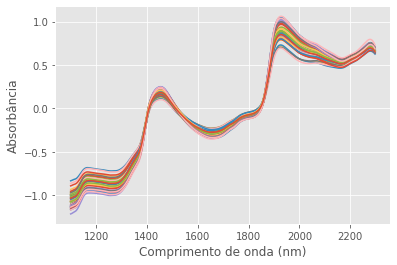

In [ ]:
with plt.style.context('ggplot'):
    plt.plot(wl, X.T)
    plt.xlabel("Comprimento de onda (nm)")
    plt.ylabel("Absorbância")

In [ ]:
X2 = savgol_filter(X, 17, polyorder=2, deriv=2)

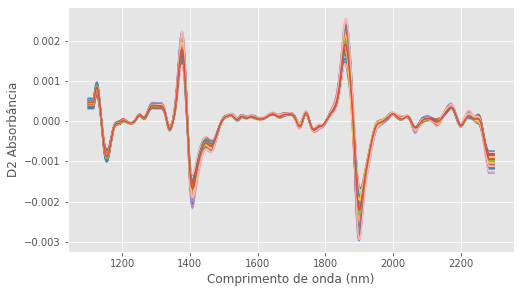

In [ ]:
#Plotando o gráfico.
plt.figure(figsize=(8, 4.5))
with plt.style.context('ggplot'):
    plt.plot(wl, X2.T)
    plt.xlabel("Comprimento de onda (nm)")
    plt.ylabel("D2 Absorbância")
    plt.show()

In [ ]:
#Função PLS
def optimise_pls_cv(X, y, n_comp):
    #Definindo o objeto PLS
    pls = PLSRegression(n_components=n_comp)

    #Validação cruzada 
    y_cv = cross_val_predict(pls, X, y, cv=10)

    #Avaliando resultado
    r2 = r2_score(y, y_cv)
    mse = mean_squared_error(y, y_cv)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_cv, r2, mse, rpd)

In [ ]:
#Teste com 40 componentes.
r2s = []
mses = []
rpds = []
xticks = np.arange(1, 41)
for n_comp in xticks:
    y_cv, r2, mse, rpd = optimise_pls_cv(X2, y, n_comp)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)

In [ ]:
#Plotando MSES (média de erro quadrática)
def plot_metrics(vals, ylabel, objective):
    with plt.style.context('ggplot'):
        plt.plot(xticks, np.array(vals), '-v', color='blue', mfc='blue')
        if objective=='min':
            idx = np.argmin(vals)
        else:
            idx = np.argmax(vals)
        plt.plot(xticks[idx], np.array(vals)[idx], 'P', ms=10, mfc='red')

        plt.xlabel('Número de componentes PLS')
        plt.xticks = xticks
        plt.ylabel(ylabel)
        plt.title('PLS')

    plt.show()

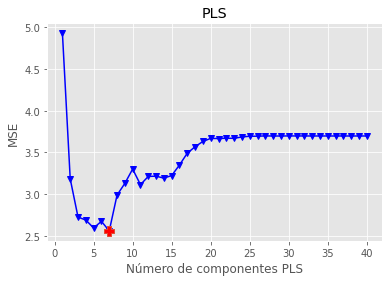

In [ ]:
plot_metrics(mses, 'MSE', 'min')

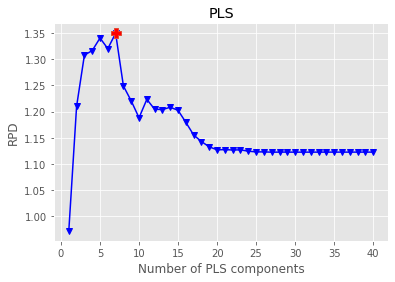

In [ ]:
plot_metrics(rpds, 'RPD', 'max')

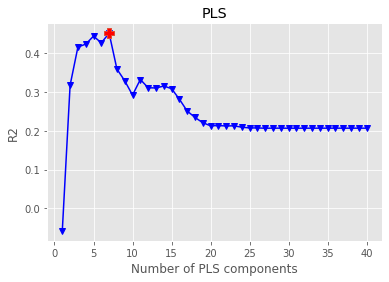

In [ ]:
plot_metrics(r2s, 'R2', 'max')

In [ ]:
y_cv, r2, mse, rpd = optimise_pls_cv(X2, y, 7)

In [ ]:
print('R2: %0.4f, MSE: %0.4f, RPD: %0.4f' %(r2, mse, rpd))

R2: 0.4509, MSE: 2.5585, RPD: 1.3495


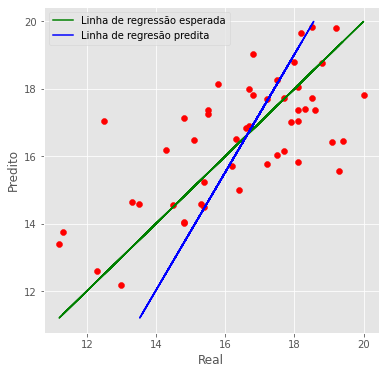

In [ ]:
plt.figure(figsize=(6, 6))
with plt.style.context('ggplot'):
    plt.scatter(y, y_cv, color='red')
    plt.plot(y, y, '-g', label='Linha de regressão esperada')
    z = np.polyfit(y, y_cv, 1)
    plt.plot(np.polyval(z, y), y, color='blue', label='Linha de regresão predita')
    plt.xlabel('Real')
    plt.ylabel('Predito')
    plt.legend()
    plt.plot()

## Aplicando PLS Regression aos dados simulados

In [ ]:
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter

from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Carregando o dataset
X = pd.read_csv("/content/x_550_650.csv", sep=";", header=None)
y = pd.read_csv("/content/y_550_650.csv", sep=";", header=None)
header = pd.read_csv("/content/EixoTempoCPMG.csv", sep=";", header=None)

In [ ]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,"0,9791","1,0062","1,0226","0,98738","0,97865","0,94009","0,94965","0,94922","0,94251","0,93722",...,"-0,021318","4,6949E-4","0,018878","-0,0010425","-0,0094565","0,014005","1,4975E-4","-0,0044189","0,026231","-0,0028778"
1,"1,0129","0,98258","0,97083","0,93134","0,93373","0,95944","0,94867","0,94778","0,92135","0,89626",...,"-0,0083001","0,034838","0,0015667","0,044649","-0,0064658","-0,0041431","-0,026748","-0,012136","0,017501","0,0086551"
2,"1,0218","0,96845","0,99087","0,92904","0,99934","0,93203","0,94486","0,91323","0,92805","0,90801",...,"-0,0096741","-0,04973","0,020713","-3,9721E-4","-0,0036986","8,2321E-4","-0,032354","-0,016045","0,012232","0,0065303"
3,"0,96962","0,99931","1,0013","0,96774","0,97903","0,93807","0,94857","0,95565","0,91028","0,89483",...,"0,024194","-0,011277","-0,012661","-0,020202","0,022896","-0,004628","-0,028103","-0,030431","0,006126","-0,012607"
4,"1,0227","0,96874","0,97562","1,0125","0,93156","0,98272","0,96289","0,95115","0,92778","0,95174",...,"0,033534","0,043352","0,038482","0,010399","-0,012633","0,018503","0,0081183","-0,0097782","-0,021218","-0,024192"


In [ ]:
X.shape

(200, 1000)

In [ ]:
y.head()

,0
0,550
1,550
2,550
3,550
4,550


In [ ]:
y.shape

(200, 1)

In [ ]:
header.head()

,0
0,0
1,5
2,10
3,15
4,20


In [ ]:
header.shape

(1000, 1)

In [ ]:
headers = header[0].tolist()

In [ ]:
data = pd.DataFrame(data=X.values, columns=headers)

In [ ]:
data.head()

,0,5,10,15,20,25,30,35,40,45,...,4950,4955,4960,4965,4970,4975,4980,4985,4990,4995
0,"0,9791","1,0062","1,0226","0,98738","0,97865","0,94009","0,94965","0,94922","0,94251","0,93722",...,"-0,021318","4,6949E-4","0,018878","-0,0010425","-0,0094565","0,014005","1,4975E-4","-0,0044189","0,026231","-0,0028778"
1,"1,0129","0,98258","0,97083","0,93134","0,93373","0,95944","0,94867","0,94778","0,92135","0,89626",...,"-0,0083001","0,034838","0,0015667","0,044649","-0,0064658","-0,0041431","-0,026748","-0,012136","0,017501","0,0086551"
2,"1,0218","0,96845","0,99087","0,92904","0,99934","0,93203","0,94486","0,91323","0,92805","0,90801",...,"-0,0096741","-0,04973","0,020713","-3,9721E-4","-0,0036986","8,2321E-4","-0,032354","-0,016045","0,012232","0,0065303"
3,"0,96962","0,99931","1,0013","0,96774","0,97903","0,93807","0,94857","0,95565","0,91028","0,89483",...,"0,024194","-0,011277","-0,012661","-0,020202","0,022896","-0,004628","-0,028103","-0,030431","0,006126","-0,012607"
4,"1,0227","0,96874","0,97562","1,0125","0,93156","0,98272","0,96289","0,95115","0,92778","0,95174",...,"0,033534","0,043352","0,038482","0,010399","-0,012633","0,018503","0,0081183","-0,0097782","-0,021218","-0,024192"


In [ ]:
data["label"] = y

In [ ]:
data

,0,5,10,15,20,25,30,35,40,45,...,4955,4960,4965,4970,4975,4980,4985,4990,4995,label
0,"0,9791","1,0062","1,0226","0,98738","0,97865","0,94009","0,94965","0,94922","0,94251","0,93722",...,"4,6949E-4","0,018878","-0,0010425","-0,0094565","0,014005","1,4975E-4","-0,0044189","0,026231","-0,0028778",550
1,"1,0129","0,98258","0,97083","0,93134","0,93373","0,95944","0,94867","0,94778","0,92135","0,89626",...,"0,034838","0,0015667","0,044649","-0,0064658","-0,0041431","-0,026748","-0,012136","0,017501","0,0086551",550
2,"1,0218","0,96845","0,99087","0,92904","0,99934","0,93203","0,94486","0,91323","0,92805","0,90801",...,"-0,04973","0,020713","-3,9721E-4","-0,0036986","8,2321E-4","-0,032354","-0,016045","0,012232","0,0065303",550
3,"0,96962","0,99931","1,0013","0,96774","0,97903","0,93807","0,94857","0,95565","0,91028","0,89483",...,"-0,011277","-0,012661","-0,020202","0,022896","-0,004628","-0,028103","-0,030431","0,006126","-0,012607",550
4,"1,0227","0,96874","0,97562","1,0125","0,93156","0,98272","0,96289","0,95115","0,92778","0,95174",...,"0,043352","0,038482","0,010399","-0,012633","0,018503","0,0081183","-0,0097782","-0,021218","-0,024192",550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,"0,99038","1,0283","0,94429","0,99117","0,93384","0,98813","0,93428","0,94165","0,94381","0,90547",...,"-0,0060163","0,025724","0,043619","-0,011611","-0,055349","3,4477E-4","-0,035711","-0,03141","-0,028633",650
196,"0,9822","1,0365","1,0083","1,002","0,97672","0,95569","0,95588","0,97322","0,95452","0,96817",...,"0,049954","0,0091502","-0,027114","-0,0066481","0,0059657","-0,01309","0,044612","0,019364","0,016179",650
197,"1,0022","1,0142","0,9656","1,0141","0,97918","0,92981","0,92897","0,92933","0,93491","0,95503",...,"-3,5851E-4","0,016506","0,01202","-0,0057134","0,03064","0,0023173","-0,016348","-0,0077374","0,010532",650
198,"0,98381","1,035","0,9966","0,94245","0,96271","0,97625","0,96885","0,92706","0,92225","0,95812",...,"0,016154","0,02363","0,028222","0,0046857","0,017433","0,010887","0,018512","0,01461","-0,0054",650


In [ ]:
data.columns

Index([      0,       5,      10,      15,      20,      25,      30,      35,
            40,      45,
       ...
          4955,    4960,    4965,    4970,    4975,    4980,    4985,    4990,
          4995, 'label'],
      dtype='object', length=1001)

In [ ]:
#Separando entre preditores (X, dados de treino) e resposta (y, target)
y = data['label'].values
X = data.values[:, :-1]

In [ ]:
y.shape

(200,)

In [ ]:
X.shape

(200, 1000)

In [ ]:
data['label'].unique()

array([550, 650])

In [ ]:
X2 = savgol_filter(X, 17, polyorder=2, deriv=2)

ValueError: ignored

In [ ]:
#Função PLS
def optimise_pls_cv(X, y, n_comp):
    #Definindo o objeto PLS
    pls = PLSRegression(n_components=n_comp)

    #Validação cruzada 
    y_cv = cross_val_predict(pls, X, y, cv=10)

    #Avaliando resultado
    r2 = r2_score(y, y_cv)
    mse = mean_squared_error(y, y_cv)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_cv, r2, mse, rpd)

In [ ]:
#Teste com 40 componentes.
r2s = []
mses = []
rpds = []
xticks = np.arange(1, 41)
for n_comp in xticks:
    y_cv, r2, mse, rpd = optimise_pls_cv(X2, y, n_comp)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)

NameError: ignored

In [ ]:
#Plotando MSES (média de erro quadrática)
def plot_metrics(vals, ylabel, objective):
    with plt.style.context('ggplot'):
        plt.plot(xticks, np.array(vals), '-v', color='blue', mfc='blue')
        if objective=='min':
            idx = np.argmin(vals)
        else:
            idx = np.argmax(vals)
        plt.plot(xticks[idx], np.array(vals)[idx], 'P', ms=10, mfc='red')

        plt.xlabel('Número de componentes PLS')
        plt.xticks = xticks
        plt.ylabel(ylabel)
        plt.title('PLS')

    plt.show()

In [ ]:
plot_metrics(mses, 'MSE', 'min')

In [ ]:
plot_metrics(mses, 'MSE', 'min')

In [ ]:
plot_metrics(r2s, 'R2', 'max')

In [ ]:
y_cv, r2, mse, rpd = optimise_pls_cv(X2, y, 7)

In [ ]:
print('R2: %0.4f, MSE: %0.4f, RPD: %0.4f' %(r2, mse, rpd))

In [ ]:
plt.figure(figsize=(6, 6))
with plt.style.context('ggplot'):
    plt.scatter(y, y_cv, color='red')
    plt.plot(y, y, '-g', label='Linha de regressão esperada')
    z = np.polyfit(y, y_cv, 1)
    plt.plot(np.polyval(z, y), y, color='blue', label='Linha de regresão predita')
    plt.xlabel('Real')
    plt.ylabel('Predito')
    plt.legend()
    plt.plot()